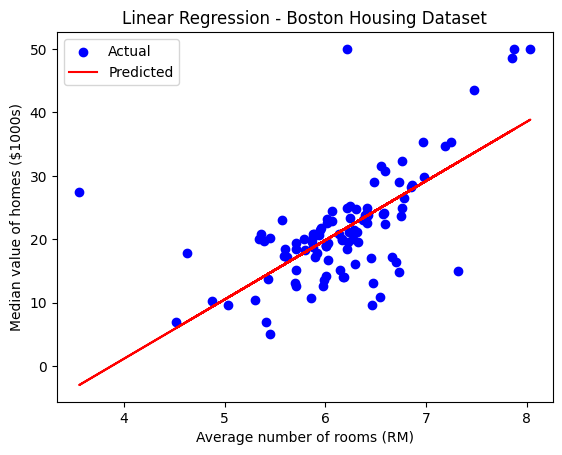

Mean Squared Error: 46.144775347317264
R^2 Score: 0.3707569232254778


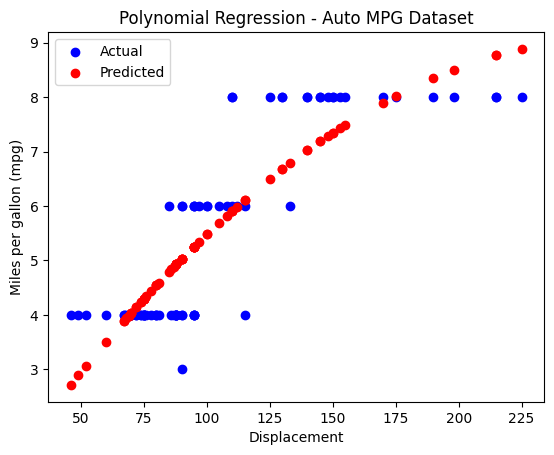

Mean Squared Error: 0.743149055720586
R^2 Score: 0.7505650609469626


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Perform linear regression on Boston Housing dataset
def linear_regression_boston():
    housing = fetch_openml(name="boston", version=1, as_frame=True)
    X = housing.data[["RM"]]
    y = housing.target

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and visualize results
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (RM)")
    plt.ylabel("Median value of homes ($1000s)")
    plt.title("Linear Regression - Boston Housing Dataset")
    plt.legend()
    plt.show()

    # Print evaluation metrics
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


# Polynomial regression on Auto MPG dataset
def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep=r'\s+', names=column_names, na_values="?").dropna()

    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    model.fit(X_train, y_train)

    # Predict and visualize results
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()

    # Print evaluation metrics
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

if __name__ == "__main__":
    linear_regression_boston()
    polynomial_regression_auto_mpg()